# <b> Iris Flower Segmentation </b>
<h4>By: Prathamesh N. Kuite</h4>

<h4>
Iris flower has three species:- <b> Setosa, Versicolor, and Virginica </b>, Which differs according to their measurements.

If we have the measurements of the iris flowers according to their species,
and we can train a Machine Learning model that can learn from the measurements of the iris species and classify them.
</h4>


## Importing libraries required

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

### Reading the dataset

In [ ]:
iris_dataset = pd.read_csv("Iris.csv")
iris_dataset = iris_dataset.drop(columns=["Id"])

### Viewing the dataset

In [ ]:
iris_dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris_dataset.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Describing the dataset 

In [ ]:
info = iris_dataset.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Counting the no. entry for each Species

In [ ]:
n1 = len(iris_dataset[iris_dataset['Species']=='Iris-versicolor'])
print("No of Versicolor in Dataset:",n1)

No of Setosa in Dataset: 50


In [ ]:
n2 = len(iris_dataset[iris_dataset['Species']=='Iris-virginica'])
print("No of Vignica in Dataset:",n2)

No of Setosa in Dataset: 50


In [ ]:
n3 = len(iris_dataset[iris_dataset['Species']=='Iris-setosa'])
print("No of Setosa in Dataset:",n3)

No of Setosa in Dataset: 50


## Visualsing the Dataset

In [ ]:
color = ['Red','Orange','Blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
columns = ["PetalWidthCm","PetalLengthCm","SepalWidthCm","SepalLengthCm"]

In [ ]:
sns.set(rc={"axes.facecolor":"lightgrey"})

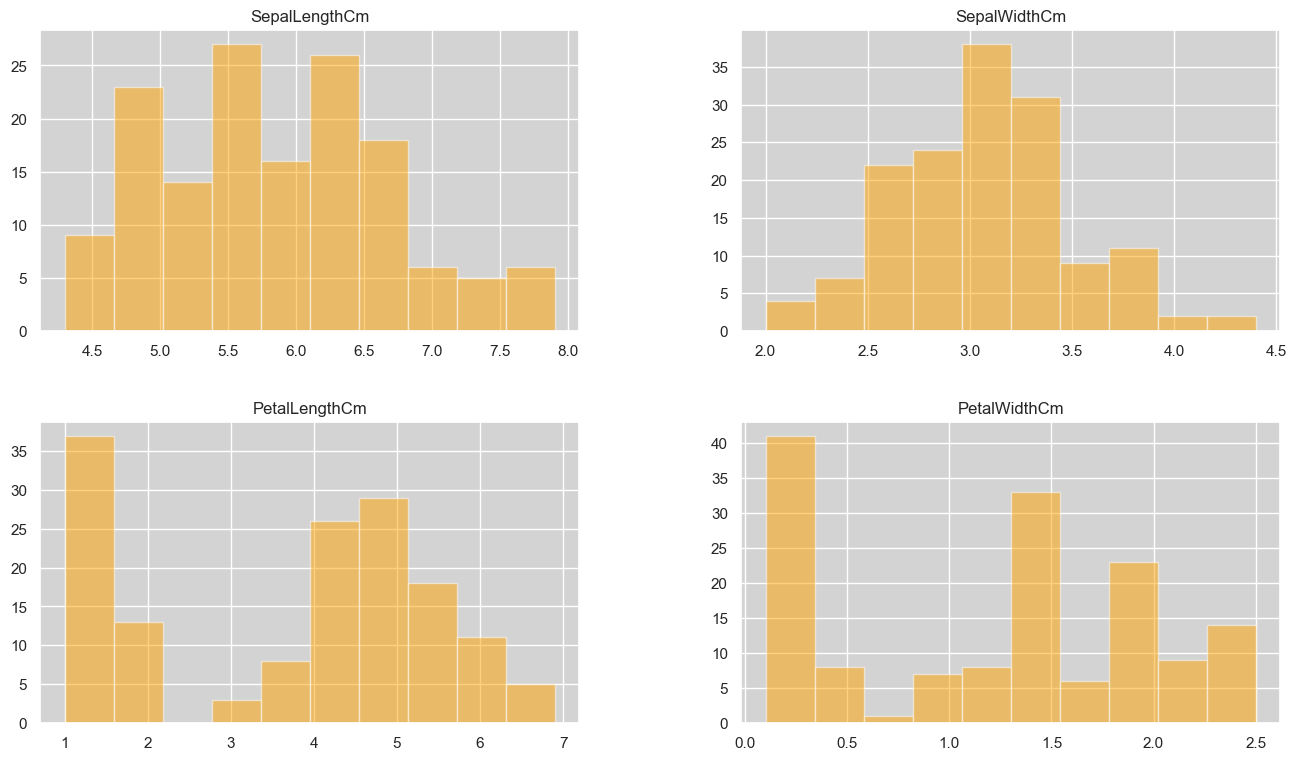

In [ ]:
iris_dataset.hist(figsize=(16,9),color="orange",alpha=0.5)
plt.show()

PetalWidthCm
PetalLengthCm
SepalWidthCm
SepalLengthCm


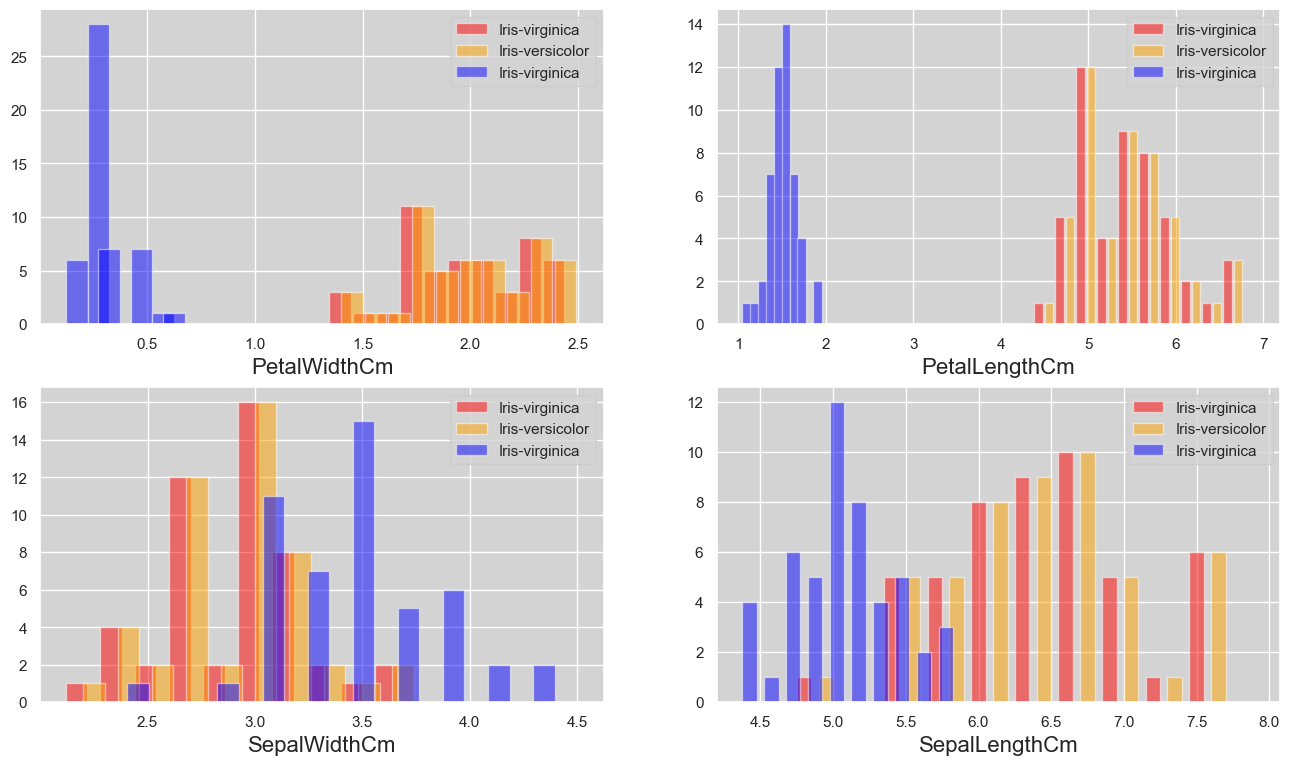

In [ ]:
# Having a look at the distribution of features which have null/missing values
plt.figure(figsize=(16,9))
s1 = iris_dataset.loc[iris_dataset['Species'] == species[0]]
s2 = iris_dataset.loc[iris_dataset['Species'] == species[1]]
s3 = iris_dataset.loc[iris_dataset['Species'] == species[2]]

for index, var in enumerate(columns):
    print(var)
    plt.subplot(2,2,index+1)
    plt.hist(s1[var],width=0.1,alpha=0.5,color=color[0],align ='left',label=species[0])
    plt.hist(s1[var],width=0.1,alpha=0.5,color=color[1],align ='mid',label=species[1])
    plt.hist(s3[var],width=0.1,alpha=0.5,color=color[2],align ='right',label=species[2])
    plt.xlabel(var,fontdict={"fontsize":16})
    plt.legend()
    

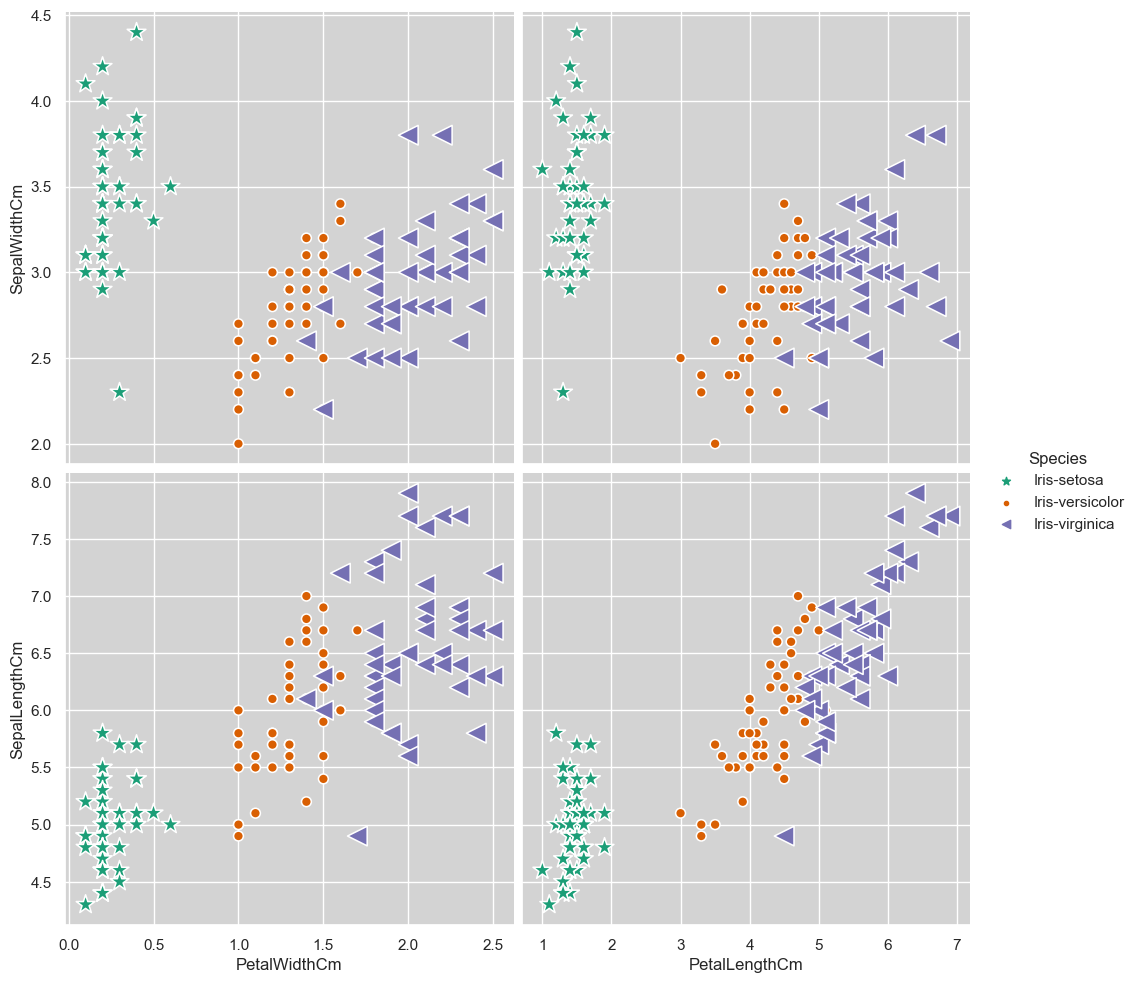

In [ ]:
sns.pairplot(iris_dataset, x_vars=columns[:2], y_vars=columns[2:],hue="Species",height=5,plot_kws={"s":200},markers=['*','.','<'] , palette='Dark2')
plt.show()

# Machine Learning Model implementation

### Spliting the dataset into test, train parts

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X = iris_dataset.drop(columns = ["Species"])
Y = iris_dataset['Species']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.25)


## importing the LogisticRegression model 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Training the model 

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

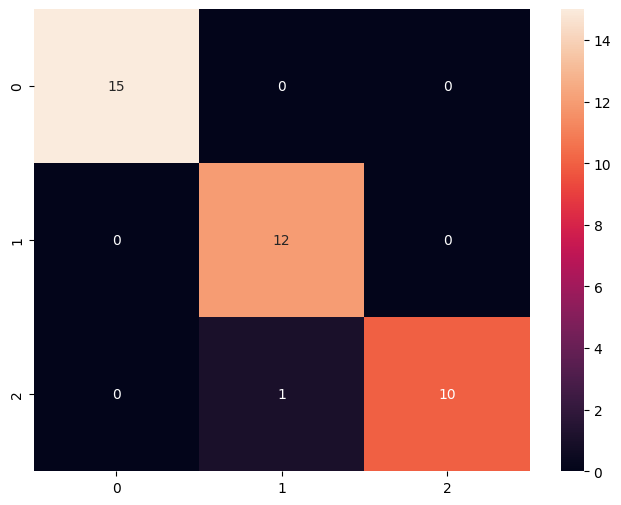

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cn_mat = confusion_matrix(y_predict, y_test)

plt.figure(figsize=(8,6))
sns.heatmap(cn_mat, annot=True)
plt.show()

In [ ]:
print(f"Accuracy of the model is :- {int(model.score(x_test, y_test)*100)}%")

Accuracy of the model is :- 97%
